In [4]:
import numpy as np
import matplotlib.pyplot as plt

MAX_N = 1_000_000

_prime_flags = None
_prime_prefix_counts = None
_prime_list = None
_prime_cache_limit = 0


def ensure_prime_cache(limit=MAX_N):
    """Compute and cache primes up to the requested limit using a sieve."""
    global _prime_flags, _prime_prefix_counts, _prime_list, _prime_cache_limit
    limit = int(limit)
    if limit <= 1:
        limit = 1
    if _prime_flags is not None and _prime_cache_limit >= limit:
        return
    sieve_limit = limit
    flags = np.ones(sieve_limit + 1, dtype=bool)
    flags[:2] = False
    max_factor = int(sieve_limit**0.5) + 1
    for p in range(2, max_factor):
        if flags[p]:
            flags[p * p : sieve_limit + 1 : p] = False
    _prime_flags = flags
    _prime_prefix_counts = np.cumsum(flags, dtype=np.int64)
    _prime_list = np.nonzero(flags)[0]
    _prime_cache_limit = sieve_limit


def is_prime(n):
    """Return True if n is prime within the cached limit."""
    n = int(n)
    if n < 2:
        return False
    if n > _prime_cache_limit:
        raise ValueError(f"is_prime is limited to {_prime_cache_limit}, got {n}")
    return bool(_prime_flags[n])


def prime_counting_function(x):
    """Return the number of primes <= x using the cached prefix sums."""
    x = int(x)
    if x < 2:
        return 0
    if x > _prime_cache_limit:
        raise ValueError(
            f"prime_counting_function is limited to {_prime_cache_limit}, got {x}"
        )
    return int(_prime_prefix_counts[x])


def primes_up_to(limit):
    """Return a NumPy array of primes <= limit."""
    limit = int(limit)
    if limit < 2:
        return np.array([], dtype=int)
    if limit > _prime_cache_limit:
        raise ValueError(
            f"primes_up_to is limited to {_prime_cache_limit}, got {limit}"
        )
    return _prime_list[_prime_list <= limit]


def prime_counts_up_to(limit):
    """Return an array of π(n) values for 0 <= n <= limit."""
    limit = int(limit)
    if limit < 0:
        raise ValueError("limit must be non-negative")
    if limit > _prime_cache_limit:
        raise ValueError(
            f"prime_counts_up_to is limited to {_prime_cache_limit}, got {limit}"
        )
    return _prime_prefix_counts[: limit + 1].copy()


ensure_prime_cache(MAX_N)

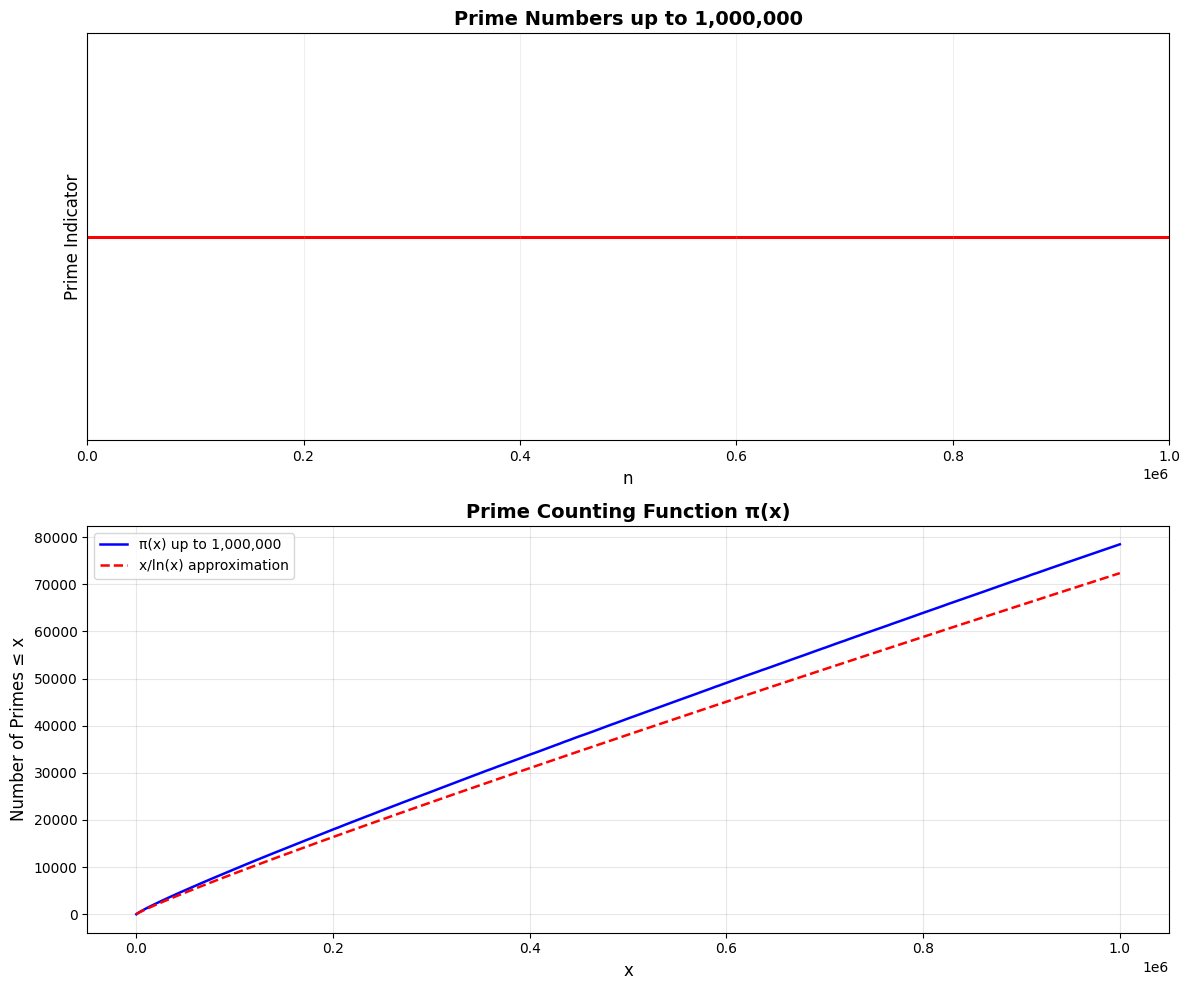

Number of primes up to 1,000,000: 78,498


In [5]:
# Visualize the cached primes up to the 1,000,000 limit
ensure_prime_cache(MAX_N)

primes = primes_up_to(MAX_N)
prime_counts = prime_counts_up_to(MAX_N)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Prime locations plotted along n for a quick visual of distribution
ax1.scatter(primes, np.ones_like(primes), s=1, color="red", alpha=0.5)
ax1.set_xlim(0, MAX_N)
ax1.set_ylim(0.95, 1.05)
ax1.set_xlabel("n", fontsize=12)
ax1.set_ylabel("Prime Indicator", fontsize=12)
ax1.set_title("Prime Numbers up to 1,000,000", fontsize=14, fontweight="bold")
ax1.set_yticks([])
ax1.grid(True, alpha=0.2)

x_sample = np.linspace(2, MAX_N, 4000, dtype=int)
pi_values = prime_counts[x_sample]
approx_values = x_sample / np.log(x_sample)

ax2.plot(x_sample, pi_values, "b-", linewidth=1.8, label="π(x) up to 1,000,000")
ax2.plot(
    x_sample,
    approx_values,
    "r--",
    linewidth=1.8,
    label="x/ln(x) approximation",
)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("Number of Primes ≤ x", fontsize=12)
ax2.set_title("Prime Counting Function π(x)", fontsize=14, fontweight="bold")
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Number of primes up to {MAX_N:,}: {prime_counting_function(MAX_N):,}")